In [ ]:
import tensorflow as tf

Displaying image from: C:\Users\PMLS\Documents\deep learning\deep learning task 1\processed_images_grayscale\cat.0.jpg


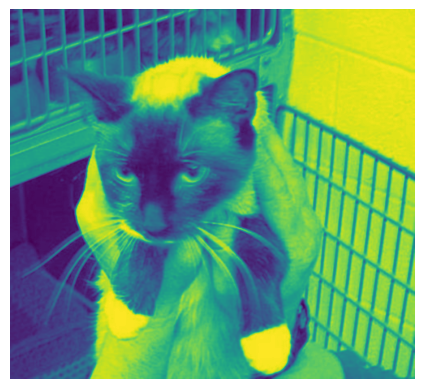

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Set dataset directory
dataset_dir = r"C:\Users\PMLS\Documents\deep learning\deep learning task 1\processed_images_grayscale"

# Load all image file paths
def load_image_paths(dataset_dir):
    image_paths = []
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):
                image_paths.append(os.path.join(root, file))
    return image_paths

# Load and display an image
def load_and_display_image(image_path):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Example usage
image_paths = load_image_paths(dataset_dir)

# Display first image
if image_paths:
    print(f"Displaying image from: {image_paths[0]}")
    load_and_display_image(image_paths[5666])
else:
    print("No images found in the dataset directory.")


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator





In [ ]:
dataset_dir =  r"C:\Users\PMLS\Documents\deep learning\deep learning task 1\processed_images_grayscale"
img_size = (64, 64)  # Resize images
classes = ['cat', 'dog']

# Load images and labels
def load_data():
    images = []
    labels = []

    for label in classes:
        class_dir = os.path.join(dataset_dir, label)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(classes.index(label))

    return np.array(images), np.array(labels)



In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Constants
dataset_dir = r"C:\Users\PMLS\Documents\deep learning\deep learning task 1\processed_images_grayscale"
img_size = (64, 64)  # Resize images

# Load images and labels
def load_data():
    images = []
    labels = []

    for img_name in os.listdir(dataset_dir):
        img_path = os.path.join(dataset_dir, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, img_size)
        images.append(img)

        # Infer label from filename
        if 'cat' in img_name:
            labels.append(0)  # Cat
        elif 'dog' in img_name:
            labels.append(1)  # Dog

    return np.array(images), np.array(labels)


In [ ]:

# Load data
X, y = load_data()



In [ ]:
# Split the dataset
X = X.reshape(-1, img_size[0], img_size[1], 1)  # Reshape for CNN
X = X.astype('float32') / 255.0  # Normalize pixel values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:


# Build the CNN model
model = models.Sequential()

# 1st Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))  # Input shape matches image dimensions
model.add(layers.MaxPooling2D((2, 2)))

# 2nd Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Convolutional Layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output from the Conv layers before passing it to fully connected layers
model.add(layers.Flatten())

# Fully connected (Dense) layer
model.add(layers.Dense(128, activation='relu'))

# Output layer (Assuming a multi-class classification problem)
model.add(layers.Dense(2, activation='softmax'))  # len(lb.classes_) gives the number of classes



C:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 298, 298, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 149, 149, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 147, 147, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 71, 71, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 35, 35, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 156800)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │      20,070,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,163,458 (76.92 MB)

 Trainable params: 20,163,458 (76.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 1)))  # Input shape matches image dimensions
model.add(MaxPooling2D((2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output from the Conv layers before passing it to fully connected layers
model.add(Flatten())

# Fully connected (Dense) layer
model.add(Dense(128, activation='relu'))

# Output layer (Binary classification - cat vs dog)
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
              metrics=['accuracy'])



In [ ]:

# Train the model
history = model.fit(X_train, y_train, epochs=10,
                    batch_size=32,
                    validation_data=(X_test, y_test))


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 93ms/step - accuracy: 0.5873 - loss: 0.6624 - val_accuracy: 0.7252 - val_loss: 0.5499
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 92ms/step - accuracy: 0.7453 - loss: 0.5140 - val_accuracy: 0.7874 - val_loss: 0.4475
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.8001 - loss: 0.4311 - val_accuracy: 0.8052 - val_loss: 0.4162
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 92ms/step - accuracy: 0.8337 - loss: 0.3721 - val_accuracy: 0.8104 - val_loss: 0.4038
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.8557 - loss: 0.3155 - val_accuracy: 0.8276 - val_loss: 0.3957
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.8771 - loss: 0.2885 - val_accuracy: 0.8236 - val_loss: 0.3932
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 93ms/step - accuracy: 0.9086 - loss: 0.2213 - val_accuracy: 0.8222 - val_loss: 0.4213
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.9289 - loss: 0.1755 - 

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

157/157 - 8s - 53ms/step - accuracy: 0.8192 - loss: 0.5782
Test accuracy: 0.8191999793052673
